In [1]:
import gym
import os
import numpy as np
from agent import DDPG
import time
import matplotlib.pyplot as plt

In [2]:
if __name__ =="__main__":
    env = gym.make("Pendulum-v0")

    kwargs = {
        "state_dim": env.observation_space.shape, 
        "n_actions": env.action_space.shape[0],
        "a_lr": 0.001,
        "c_lr": 0.002,
        "env": env, 
        "gamma": 0.99, 
        "mem_size": 50000, 
        "tau": 0.005, 
        "fc1_dims": 400, 
        "fc2_dims": 300, 
        "batch_size": 64}
    
    agent = DDPG(**kwargs)

    if not os.path.exists('model'): 
        os.mkdir('model')
    
    if not os.path.exists('best_model'): 
        os.mkdir('best_model')

    n_games = 201

    best_score = env.reward_range[0]
    score_history = []
    evaluate = False

    save_interval = 50
    best_interval = 150
    best_score = -1000

   
    for i in range(n_games):
        observation = env.reset()
        done = False
        score = 0
        while not done:
            action = agent.select_action(observation, evaluate)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.store_transition(observation, action, reward,
                                   observation_, done)
            agent.learn()
            observation = observation_

        score_history.append(score)
        avg_score = np.mean(score_history[-100:])

        
        '''save model'''
        if i % save_interval==0:
            agent.save(i)
            

        ''' best model '''
        if i >= best_interval:
            if score_history[-1] > best_score:
                agent.best_save()
        

        print('episode {} score {:.3f} avg score {:.3f}'.
              format(i, score, avg_score))

c:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
c:\Users\Lenovo\Desktop\Python\Reinforcement Learning\4. Policy gradient\DDPG\Pytorch\agent.py:123: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  state = T.tensor([state], dtype=T.float)
c:\Users\Lenovo\Desktop\Python\Reinforcement Learning\4. Policy gradient\DDPG\Pytorch\agent.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  states = T.tensor(states, dtype

episode 0 score -1622.212 avg score -1622.212
episode 1 score -1628.894 avg score -1625.553
episode 2 score -1599.145 avg score -1616.750
episode 3 score -1514.447 avg score -1591.174
episode 4 score -1335.913 avg score -1540.122
episode 5 score -1125.367 avg score -1470.996
episode 6 score -1420.227 avg score -1463.744
episode 7 score -1193.514 avg score -1429.965
episode 8 score -1275.677 avg score -1412.822
episode 9 score -916.053 avg score -1363.145
episode 10 score -980.081 avg score -1328.321
episode 11 score -891.755 avg score -1291.940
episode 12 score -911.115 avg score -1262.646
episode 13 score -1192.745 avg score -1257.653
episode 14 score -1179.363 avg score -1252.434
episode 15 score -894.084 avg score -1230.037
episode 16 score -740.398 avg score -1201.235
episode 17 score -122.904 avg score -1141.327
episode 18 score -1277.749 avg score -1148.507
episode 19 score -124.215 avg score -1097.293
episode 20 score -511.368 avg score -1069.392
episode 21 score -120.779 avg sc

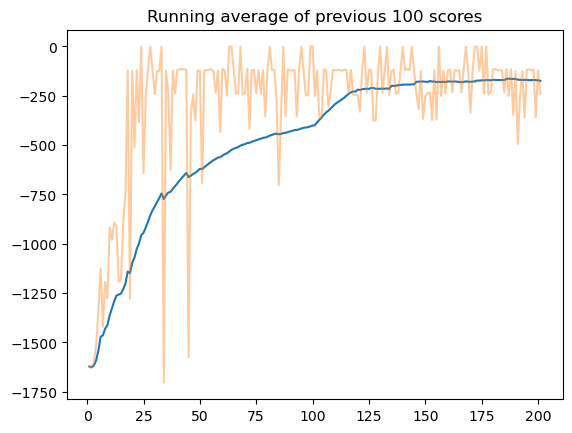

In [3]:
def plot_learning_curve(x, scores):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.plot(x, score_history, alpha=0.4)
    plt.title('Running average of previous 100 scores')

x = [i+1 for i in range(n_games)]
plot_learning_curve(x, score_history)

In [4]:
env = gym.make("Pendulum-v0")

kwargs = {
    "state_dim": env.observation_space.shape, 
    "n_actions": env.action_space.shape[0],
    "a_lr": 0.001,
    "c_lr": 0.002,
    "env": env, 
    "gamma": 0.99, 
    "mem_size": 50000, 
    "tau": 0.005, 
    "fc1_dims": 400, 
    "fc2_dims": 300, 
    "batch_size": 64}

model = DDPG(**kwargs)

model.load_best()
scores = []


for i in range(5):
    obs = env.reset()
    actions = []
    score = 0
    while True:
        action = model.select_action(obs, evaluate=True)
        obs, reward, done, info = env.step(action)
        score += reward
        actions.append(action)

        if done:
            print(f"Done, points: {score}")
            break
    
    scores.append(score)

print(f"Mean score: {np.mean(scores)}")

Done, points: -259.6918660440072
Done, points: -114.96357148660925
Done, points: -239.13705637152805
Done, points: -123.49739565123151
Done, points: -235.14996239179834
Mean score: -194.48797038903487
